In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
class KNearestNeighbor():
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def predict(self, x, measure="euclidean"):
        closest_class_1 = self.distance(self.X[self.y==0], x, measure)
        closest_class_2 = self.distance(self.X[self.y==1], x, measure)
        f_x = closest_class_1 - closest_class_2
        return 1 if f_x>0 else 0
    def distance(self, X, x, measure="euclidean"):
        d_X_x = None
        if measure=="city-block":
            d_X_x = self._city_block(X, x)
        elif measure=="square":
            d_X_x = self._square(X, x)
        else:
            d_X_x = self._euclidean(X, x)
        return d_X_x
    def _euclidean(self, X, x):
        d = 0
        for sample in X:
            d += np.sqrt((sample[0]-x[0])**2 + (sample[1]-x[1])**2)
        d /= len(X)
        return d
    def _city_block(self, X, x):
        d = 0
        for sample in X:
            d += np.abs((sample[0]-x[0]) + (sample[1]-x[1]))
        d /= len(X)
        return d
    def _square(self, X, x):
        d = 0
        for sample in X:
            d += np.max([(sample[0]-x[0]),  (sample[1]-x[1])])
        d /= len(X)
        return d

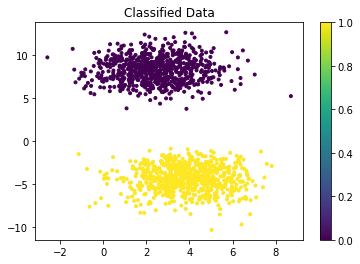

In [18]:
X, y = datasets.make_blobs(n_samples=1500, n_features=2,
                           centers=2, cluster_std=1.5,
                          )

sc = plt.scatter(X[:,0], X[:,1],
                 c=y, marker='.'
                )
plt.colorbar(sc)
plt.title('Classified Data')
plt.savefig('classified-input.png')
plt.show()

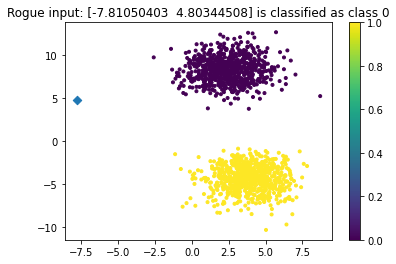

In [28]:
model = KNearestNeighbor(X, y)
x = np.random.normal(loc=0, size=2) * 5
predicted = model.predict(x)

sc = plt.scatter(X[:,0], X[:,1],
                 c=y, marker='.'
                )
plt.scatter(x[0], x[1],
            marker='D'
           )
plt.colorbar(sc)
plt.title(f"Rogue input: {x} is classified as class {predicted}")
plt.savefig('rogue-input.png')
plt.show()